<a href="https://colab.research.google.com/github/AmalaRaju/DDDS-Projects/blob/main/SQL_Chinook_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project SQL - Chinook


## Chinook data set

See the lecture on SQLite3 using the Chinook data set to set up the software, database, and tables, as well as for the links to ancillary information about the data set.


In [16]:
# Install the sqlite package for Ubuntu
# Download the Chinook sqlite database
import sqlite3 as db
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [17]:
%%capture
%%bash
apt-get update
apt-get install -y sqlite3

In [18]:
%%bash
[ -f chinook.zip ] ||
  curl -s -O https://www.sqlitetutorial.net/wp-content/uploads/2018/03/chinook.zip
unzip -l chinook.zip

Archive:  chinook.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
   884736  2015-11-29 10:53   chinook.db
---------                     -------
   884736                     1 file


In [19]:
!rm -f chinook.db

In [20]:
!unzip -u chinook.zip

Archive:  chinook.zip
  inflating: chinook.db              


In [21]:
!ls -la

total 1180
drwxr-xr-x 1 root root   4096 Apr  4 21:08 .
drwxr-xr-x 1 root root   4096 Apr  4 19:27 ..
-rw-r--r-- 1 root root 884736 Nov 29  2015 chinook.db
-rw-r--r-- 1 root root 305596 Apr  4 19:29 chinook.zip
drwxr-xr-x 4 root root   4096 Apr  3 13:37 .config
drwxr-xr-x 1 root root   4096 Apr  3 13:37 sample_data


In [22]:

%%script sqlite3 --column --header chinook.db
.tables


albums          employees       invoices        playlists     
artists         genres          media_types     tracks        
customers       invoice_items   playlist_track


In [23]:
%%script sqlite3 --column --header chinook.db
select *
from employees
limit 10


EmployeeId  LastName  FirstName  Title                ReportsTo  BirthDate            HireDate             Address                      City        State  Country  PostalCode  Phone              Fax                Email                   
----------  --------  ---------  -------------------  ---------  -------------------  -------------------  ---------------------------  ----------  -----  -------  ----------  -----------------  -----------------  ------------------------
1           Adams     Andrew     General Manager                 1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW          Edmonton    AB     Canada   T5K 2N1     +1 (780) 428-9482  +1 (780) 428-3457  andrew@chinookcorp.com  
2           Edwards   Nancy      Sales Manager        1          1958-12-08 00:00:00  2002-05-01 00:00:00  825 8 Ave SW                 Calgary     AB     Canada   T2P 2T3     +1 (403) 262-3443  +1 (403) 262-3322  nancy@chinookcorp.com   
3           Peacock   Jane       Sales Suppo

## Come up with questions about your data
Have a look at the Entity-Relation ( ER ) diagram to help come up with questions.

* What sort of information is in this dataset?
* How many records are there?
* How many different countries (states, counties, cities, etc) have records in this data set?


If you are stuck, here are some ideas for questions:
- https://github.com/LucasMcL/15-sql_queries_02-chinook/blob/master/README.md
- [Using the R language]( https://rpubs.com/enext777/636199 )
- [Search Google]( https://www.google.com/search?q=chinook+database+questions )



Questions:

1.   What kind of information does this dataset store?
2.   How many records are in each table?
3.   What are the primary and foreign keys in the database?
4.   Which customer has made the highest number of purchases?
5.   How are the tables related to each other?
6.   How many unique customers are in the database?
7.   What are the total sales in the database?
8.   How many different countries, states, or cities are represented in the customer data?
9.   How many tracks are in the database?
10.  What is the total duration of all tracks in hours?










## Use SQL queries to pull specific information

Do NOT pull all the data and then filter using DataFrame methods etc. Make sure and use AT LEAST 13 of the 15 SQL options listed below. (You may have to get creative and come up with more questions to ask/answer.)


### Basic Queries


#### SELECT (with * and with column names)


In [24]:
#Provide a query showing details of all employees
%%script sqlite3 --column --header chinook.db
select *
from employees


EmployeeId  LastName  FirstName  Title                ReportsTo  BirthDate            HireDate             Address                      City        State  Country  PostalCode  Phone              Fax                Email                   
----------  --------  ---------  -------------------  ---------  -------------------  -------------------  ---------------------------  ----------  -----  -------  ----------  -----------------  -----------------  ------------------------
1           Adams     Andrew     General Manager                 1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW          Edmonton    AB     Canada   T5K 2N1     +1 (780) 428-9482  +1 (780) 428-3457  andrew@chinookcorp.com  
2           Edwards   Nancy      Sales Manager        1          1958-12-08 00:00:00  2002-05-01 00:00:00  825 8 Ave SW                 Calgary     AB     Canada   T2P 2T3     +1 (403) 262-3443  +1 (403) 262-3322  nancy@chinookcorp.com   
3           Peacock   Jane       Sales Suppo

In [25]:
#Provide a query showing FirstName,LastName,City,BirthDate of all employees
%%script sqlite3 --column --header chinook.db
select FirstName,LastName,City,BirthDate from employees

FirstName  LastName  City        BirthDate          
---------  --------  ----------  -------------------
Andrew     Adams     Edmonton    1962-02-18 00:00:00
Nancy      Edwards   Calgary     1958-12-08 00:00:00
Jane       Peacock   Calgary     1973-08-29 00:00:00
Margaret   Park      Calgary     1947-09-19 00:00:00
Steve      Johnson   Calgary     1965-03-03 00:00:00
Michael    Mitchell  Calgary     1973-07-01 00:00:00
Robert     King      Lethbridge  1970-05-29 00:00:00
Laura      Callahan  Lethbridge  1968-01-09 00:00:00


#### WHERE


In [26]:
#Provide a query showing the details of employees who belongs to the city 'Lethbridge'
%%script sqlite3 --column --header chinook.db
Select * from employees where City='Lethbridge'

EmployeeId  LastName  FirstName  Title     ReportsTo  BirthDate            HireDate             Address                      City        State  Country  PostalCode  Phone              Fax                Email                 
----------  --------  ---------  --------  ---------  -------------------  -------------------  ---------------------------  ----------  -----  -------  ----------  -----------------  -----------------  ----------------------
7           King      Robert     IT Staff  6          1970-05-29 00:00:00  2004-01-02 00:00:00  590 Columbia Boulevard West  Lethbridge  AB     Canada   T1K 5N8     +1 (403) 456-9986  +1 (403) 456-8485  robert@chinookcorp.com
8           Callahan  Laura      IT Staff  6          1968-01-09 00:00:00  2004-03-04 00:00:00  923 7 ST NW                  Lethbridge  AB     Canada   T1H 1Y8     +1 (403) 467-3351  +1 (403) 467-8772  laura@chinookcorp.com 


In [27]:
  #Provide a query showing the Invoices of customers who are from Brazil. The resultant table should show the customer's full name, Invoice ID, Date of the invoice and billing country.
%%script sqlite3 --column --header chinook.db
Select c.[FirstName]
      ,c.[LastName],i.[InvoiceId],i.[InvoiceDate],i.[BillingCountry] from invoices i left join customers c on i.[CustomerId]=c.[CustomerId] where i.[BillingCountry]='Brazil'

FirstName  LastName   InvoiceId  InvoiceDate          BillingCountry
---------  ---------  ---------  -------------------  --------------
Eduardo    Martins    25         2009-04-09 00:00:00  Brazil        
Roberto    Almeida    34         2009-05-23 00:00:00  Brazil        
Fernanda   Ramos      35         2009-06-05 00:00:00  Brazil        
Alexandre  Rocha      57         2009-09-06 00:00:00  Brazil        
Fernanda   Ramos      58         2009-09-07 00:00:00  Brazil        
Alexandre  Rocha      68         2009-10-17 00:00:00  Brazil        
Fernanda   Ramos      80         2009-12-10 00:00:00  Brazil        
Luís       Gonçalves  98         2010-03-11 00:00:00  Brazil        
Luís       Gonçalves  121        2010-06-13 00:00:00  Brazil        
Alexandre  Rocha      123        2010-06-17 00:00:00  Brazil        
Fernanda   Ramos      132        2010-07-31 00:00:00  Brazil        
Luís       Gonçalves  143        2010-09-15 00:00:00  Brazil        
Eduardo    Martins    154        2

#### AND


In [28]:
#Provide a query showing the details of customers who are from USA and works in Google Inc.
%%script sqlite3 --column --header chinook.db
Select [FirstName]
      ,[LastName]
      ,[Company] ,[City]
      ,[State]
      ,[Country]  FROM [Customers] where [Country]='USA' and [Company]='Google Inc.'

FirstName  LastName  Company      City           State  Country
---------  --------  -----------  -------------  -----  -------
Frank      Harris    Google Inc.  Mountain View  CA     USA    


#### OR


In [29]:
#Provide a query showing the details of employees who belongs to the city'Calgary' or 'Edmonton'
%%script sqlite3 --column --header chinook.db
Select * FROM [Employees] where [City]='Calgary' or [City]='Edmonton'

EmployeeId  LastName  FirstName  Title                ReportsTo  BirthDate            HireDate             Address               City      State  Country  PostalCode  Phone              Fax                Email                   
----------  --------  ---------  -------------------  ---------  -------------------  -------------------  --------------------  --------  -----  -------  ----------  -----------------  -----------------  ------------------------
1           Adams     Andrew     General Manager                 1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW   Edmonton  AB     Canada   T5K 2N1     +1 (780) 428-9482  +1 (780) 428-3457  andrew@chinookcorp.com  
2           Edwards   Nancy      Sales Manager        1          1958-12-08 00:00:00  2002-05-01 00:00:00  825 8 Ave SW          Calgary   AB     Canada   T2P 2T3     +1 (403) 262-3443  +1 (403) 262-3322  nancy@chinookcorp.com   
3           Peacock   Jane       Sales Support Agent  2          1973-08-29 00:0

#### LIKE (with % or _ wildcard)


In [30]:
#Provide a query showing the details of employees whose name starts with A
%%script sqlite3 --column --header chinook.db
Select * FROM [Employees] where FirstName like 'A%'

EmployeeId  LastName  FirstName  Title            ReportsTo  BirthDate            HireDate             Address              City      State  Country  PostalCode  Phone              Fax                Email                 
----------  --------  ---------  ---------------  ---------  -------------------  -------------------  -------------------  --------  -----  -------  ----------  -----------------  -----------------  ----------------------
1           Adams     Andrew     General Manager             1962-02-18 00:00:00  2002-08-14 00:00:00  11120 Jasper Ave NW  Edmonton  AB     Canada   T5K 2N1     +1 (780) 428-9482  +1 (780) 428-3457  andrew@chinookcorp.com


In [31]:
#Provide a query showing the details of employees whose name ends with 'ark' with exactly one letter before it
%%script sqlite3 --column --header chinook.db
Select * FROM [Employees] where LastName like '_ark'

EmployeeId  LastName  FirstName  Title                ReportsTo  BirthDate            HireDate             Address           City     State  Country  PostalCode  Phone              Fax                Email                   
----------  --------  ---------  -------------------  ---------  -------------------  -------------------  ----------------  -------  -----  -------  ----------  -----------------  -----------------  ------------------------
4           Park      Margaret   Sales Support Agent  2          1947-09-19 00:00:00  2003-05-03 00:00:00  683 10 Street SW  Calgary  AB     Canada   T2P 5G3     +1 (403) 263-4423  +1 (403) 263-4289  margaret@chinookcorp.com


#### BETWEEN


In [32]:
#Provide a query to filter the invoice details for the year 2010
%%script sqlite3 --column --header chinook.db
SELECT  *
FROM Invoices WHERE InvoiceDate between '2010-01-01 00:00:00' and '2010-12-31 00:00:00' limit 50;



InvoiceId  CustomerId  InvoiceDate          BillingAddress                            BillingCity          BillingState  BillingCountry  BillingPostalCode  Total
---------  ----------  -------------------  ----------------------------------------  -------------------  ------------  --------------  -----------------  -----
84         43          2010-01-08 00:00:00  68, Rue Jouvence                          Dijon                              France          21000              1.98 
85         45          2010-01-08 00:00:00  Erzsébet krt. 58.                         Budapest                           Hungary         H-1073             1.98 
86         47          2010-01-09 00:00:00  Via Degli Scipioni, 43                    Rome                 RM            Italy           00192              3.96 
87         51          2010-01-10 00:00:00  Celsiusg. 9                               Stockholm                          Sweden          11230              6.94 
88         57          2010-

#### LIMIT



In [33]:
#Fetch the top 10 records of invoices table
%%script sqlite3 --column --header chinook.db
Select * from invoices limit 10

InvoiceId  CustomerId  InvoiceDate          BillingAddress           BillingCity  BillingState  BillingCountry  BillingPostalCode  Total
---------  ----------  -------------------  -----------------------  -----------  ------------  --------------  -----------------  -----
1          2           2009-01-01 00:00:00  Theodor-Heuss-Straße 34  Stuttgart                  Germany         70174              1.98 
2          4           2009-01-02 00:00:00  Ullevålsveien 14         Oslo                       Norway          0171               3.96 
3          8           2009-01-03 00:00:00  Grétrystraat 63          Brussels                   Belgium         1000               5.94 
4          14          2009-01-06 00:00:00  8210 111 ST NW           Edmonton     AB            Canada          T6G 2C7            8.91 
5          23          2009-01-11 00:00:00  69 Salem Street          Boston       MA            USA             2113               13.86
6          37          2009-01-19 00:00:0

### Sorting and Grouping


#### ORDER BY


In [34]:
#Fetch the top 50 records of invoices table by sorting on the basis of date in ascending order
%%script sqlite3 --column --header chinook.db
Select * from invoices order by InvoiceDate asc limit 20

InvoiceId  CustomerId  InvoiceDate          BillingAddress             BillingCity    BillingState  BillingCountry  BillingPostalCode  Total
---------  ----------  -------------------  -------------------------  -------------  ------------  --------------  -----------------  -----
1          2           2009-01-01 00:00:00  Theodor-Heuss-Straße 34    Stuttgart                    Germany         70174              1.98 
2          4           2009-01-02 00:00:00  Ullevålsveien 14           Oslo                         Norway          0171               3.96 
3          8           2009-01-03 00:00:00  Grétrystraat 63            Brussels                     Belgium         1000               5.94 
4          14          2009-01-06 00:00:00  8210 111 ST NW             Edmonton       AB            Canada          T6G 2C7            8.91 
5          23          2009-01-11 00:00:00  69 Salem Street            Boston         MA            USA             2113               13.86
6          37

#### DISTINCT


In [35]:
#Provide a query to fetch the distinct countries from Customers table
%%script sqlite3 --column --header chinook.db
Select distinct(Country) from Customers

Country       
--------------
Brazil        
Germany       
Canada        
Norway        
Czech Republic
Austria       
Belgium       
Denmark       
USA           
Portugal      
France        
Finland       
Hungary       
Ireland       
Italy         
Netherlands   
Poland        
Spain         
Sweden        
United Kingdom
Australia     
Argentina     
Chile         
India         


#### GROUP BY



In [36]:
%%script sqlite3 --column --header chinook.db
Select BillingCountry,sum(Total) as InvoiceTotal from invoices group by BillingCountry order by InvoiceTotal desc

BillingCountry  InvoiceTotal
--------------  ------------
USA             523.06      
Canada          303.96      
France          195.1       
Brazil          190.1       
Germany         156.48      
United Kingdom  112.86      
Czech Republic  90.24       
Portugal        77.24       
India           75.26       
Chile           46.62       
Ireland         45.62       
Hungary         45.62       
Austria         42.62       
Finland         41.62       
Netherlands     40.62       
Norway          39.62       
Sweden          38.62       
Poland          37.62       
Italy           37.62       
Denmark         37.62       
Australia       37.62       
Argentina       37.62       
Spain           37.62       
Belgium         37.62       


### Aggregates


#### MAX


In [37]:
%%script sqlite3 --column --header chinook.db
WITH InvoiceTotals AS (
    SELECT BillingCountry, SUM(Total) AS InvoiceTotal
    FROM Invoices
    GROUP BY BillingCountry
)
SELECT BillingCountry, InvoiceTotal
FROM InvoiceTotals
WHERE InvoiceTotal = (SELECT MAX(InvoiceTotal) FROM InvoiceTotals);


BillingCountry  InvoiceTotal
--------------  ------------
USA             523.06      


#### MIN


In [38]:
%%script sqlite3 --column --header chinook.db
WITH InvoiceTotals AS (
    SELECT BillingCountry, ROUND(SUM(Total), 2) AS InvoiceTotal
    FROM Invoices
    GROUP BY BillingCountry
)
SELECT BillingCountry, InvoiceTotal
FROM InvoiceTotals
WHERE InvoiceTotal = (SELECT MIN(InvoiceTotal) FROM InvoiceTotals);

BillingCountry  InvoiceTotal
--------------  ------------
Argentina       37.62       
Australia       37.62       
Belgium         37.62       
Denmark         37.62       
Italy           37.62       
Poland          37.62       
Spain           37.62       


#### SUM


In [39]:
%%script sqlite3 --column --header chinook.db
Select SUM(Total) from Invoices

SUM(Total)
----------
2328.6    


#### AVG


In [40]:
%%script sqlite3 --column --header chinook.db
Select AVG(Total) from Invoices

AVG(Total)      
----------------
5.65194174757282


#### COUNT



In [41]:
%%script sqlite3 --column --header chinook.db
Select count(*) from invoices where InvoiceDate between '2010-01-01 00:00:00' and '2010-12-31 00:00:00';


count(*)
--------
83      


## Make some plots

Make some cool plots to go with your data. Write SQL queries to get ONLY the information you need for each plot. (Don't pull ALL the data and then just plot a few columns.)



In [42]:
# Connect to a sqlite database and load a result set into a data frame
conn = db.connect("chinook.db")

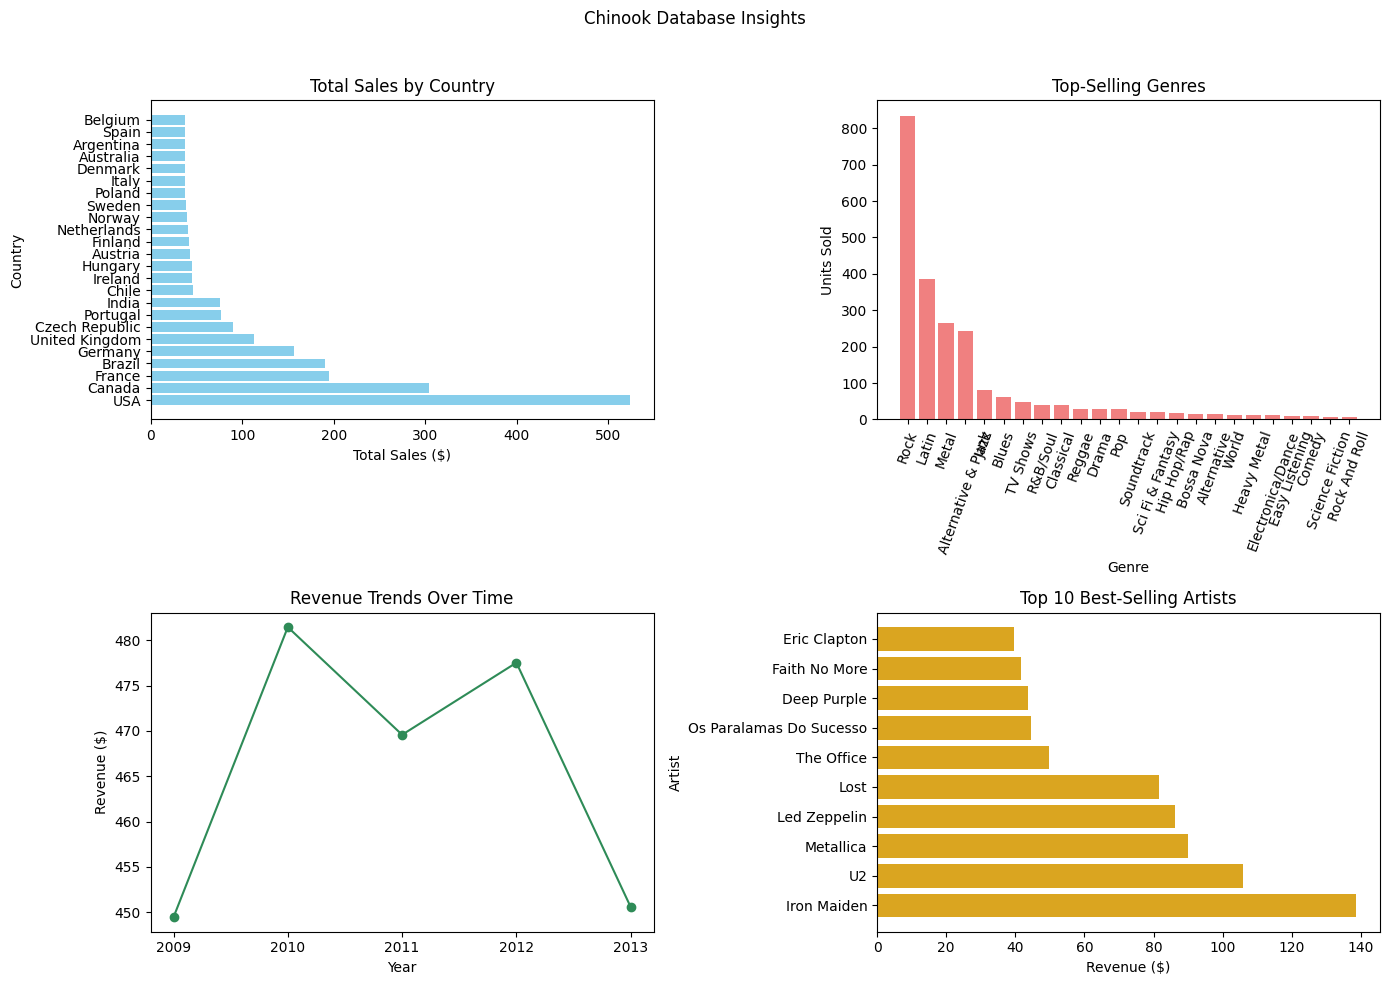

In [43]:
# Query 1: Total Sales by Country
query1 = """
    SELECT BillingCountry, SUM(Total) AS TotalSales
    FROM invoices
    GROUP BY BillingCountry
    ORDER BY TotalSales DESC;
"""
df_sales_by_country = pd.read_sql_query(query1, conn)

# Query 2: Top-Selling Genres
query2 = """
    SELECT g.Name AS Genre, SUM(ii.Quantity) AS TotalSold
    FROM invoice_items ii
    JOIN tracks t ON ii.TrackId = t.TrackId
    JOIN genres g ON t.GenreId = g.GenreId
    GROUP BY g.Name
    ORDER BY TotalSold DESC;
"""
df_top_genres = pd.read_sql_query(query2, conn)

# Query 3: Revenue Trends Over Time
query3 = """
    SELECT strftime('%Y', InvoiceDate) AS Year, SUM(Total) AS Revenue
    FROM invoices
    GROUP BY Year
    ORDER BY Year;
"""
df_revenue_trends = pd.read_sql_query(query3, conn)

# Query 4: Top 10 Best-Selling Artists
query4 = """
    SELECT ar.Name AS Artist, SUM(ii.UnitPrice * ii.Quantity) AS Revenue
    FROM invoice_items ii
    JOIN tracks t ON ii.TrackId = t.TrackId
    JOIN albums a ON t.AlbumId = a.AlbumId
    JOIN artists ar ON a.ArtistId = ar.ArtistId
    GROUP BY ar.Name
    ORDER BY Revenue DESC
    LIMIT 10;
"""
df_top_artists = pd.read_sql_query(query4, conn)

# Close the connection
#conn.close()

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Chinook Database Insights")

# Plot 1: Total Sales by Country
axes[0, 0].barh(df_sales_by_country["BillingCountry"], df_sales_by_country["TotalSales"], color='skyblue')
axes[0, 0].set_xlabel("Total Sales ($)")
axes[0, 0].set_ylabel("Country")
axes[0, 0].set_title("Total Sales by Country")

# Plot 2: Top-Selling Genres
axes[0, 1].bar(df_top_genres["Genre"], df_top_genres["TotalSold"], color='lightcoral')
axes[0, 1].set_xlabel("Genre")
axes[0, 1].set_ylabel("Units Sold")
axes[0, 1].set_title("Top-Selling Genres")
axes[0, 1].tick_params(axis='x', rotation=70)

# Plot 3: Revenue Trends Over Time
axes[1, 0].plot(df_revenue_trends["Year"], df_revenue_trends["Revenue"], marker='o', linestyle='-', color='seagreen')
axes[1, 0].set_xlabel("Year")
axes[1, 0].set_ylabel("Revenue ($)")
axes[1, 0].set_title("Revenue Trends Over Time")

# Plot 4: Top 10 Best-Selling Artists
axes[1, 1].barh(df_top_artists["Artist"], df_top_artists["Revenue"], color='goldenrod')
axes[1, 1].set_xlabel("Revenue ($)")
axes[1, 1].set_ylabel("Artist")
axes[1, 1].set_title("Top 10 Best-Selling Artists")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## EXTRA CREDIT:
* Use a CTE
* Use a query that joins two or more tables.
* Make a model to see if you can predict something
* Come up with something else cool to do with your data


In [44]:
# Query: Extract customer purchase behavior and invoice totals
query = """
    SELECT c.CustomerId, c.Country, COUNT(i.InvoiceId) AS PurchaseFrequency,
           AVG(i.Total) AS AvgOrderValue, SUM(i.Total) AS TotalSpent
    FROM customers c
    JOIN invoices i ON c.CustomerId = i.CustomerId
    GROUP BY c.CustomerId;
"""

# Load data into Pandas DataFrame
df = pd.read_sql_query(query, conn)

In [45]:
df.head()

,CustomerId,Country,PurchaseFrequency,AvgOrderValue,TotalSpent
0,1,Brazil,7,5.660000,39.62
1,2,Germany,7,5.374286,37.62
2,3,Canada,7,5.660000,39.62
3,4,Norway,7,5.660000,39.62
4,5,Czech Republic,7,5.802857,40.62


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerId         59 non-null     int64  
 1   Country            59 non-null     object 
 2   PurchaseFrequency  59 non-null     int64  
 3   AvgOrderValue      59 non-null     float64
 4   TotalSpent         59 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.4+ KB


In [47]:
df['Country'].value_counts()

,count
Country,
USA,13
Canada,8
France,5
Brazil,5
Germany,4
United Kingdom,3
Portugal,2
Czech Republic,2
India,2


In [48]:
# Applying One-Hot Encoding using get_dummies
df_encoded = pd.get_dummies(df, columns=['Country'], drop_first=True)

In [49]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 27 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerId              59 non-null     int64  
 1   PurchaseFrequency       59 non-null     int64  
 2   AvgOrderValue           59 non-null     float64
 3   TotalSpent              59 non-null     float64
 4   Country_Australia       59 non-null     bool   
 5   Country_Austria         59 non-null     bool   
 6   Country_Belgium         59 non-null     bool   
 7   Country_Brazil          59 non-null     bool   
 8   Country_Canada          59 non-null     bool   
 9   Country_Chile           59 non-null     bool   
 10  Country_Czech Republic  59 non-null     bool   
 11  Country_Denmark         59 non-null     bool   
 12  Country_Finland         59 non-null     bool   
 13  Country_France          59 non-null     bool   
 14  Country_Germany         59 non-null     bool

In [50]:
# Define features (X) and target variable (y)
X = df_encoded.drop(columns=['TotalSpent'])
y = df_encoded['TotalSpent']

# Scale numerical features
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.70293864,  0.13130643,  0.01683668, ..., -0.13130643,
        -0.53160953, -0.23145502],
       [-1.64421661,  0.13130643, -0.6746002 , ..., -0.13130643,
        -0.53160953, -0.23145502],
       [-1.58549459,  0.13130643,  0.01683668, ..., -0.13130643,
        -0.53160953, -0.23145502],
       ...,
       [ 1.58549459,  0.13130643,  2.43686576, ..., -0.13130643,
        -0.53160953, -0.23145502],
       [ 1.64421661,  0.13130643, -0.32888176, ..., -0.13130643,
        -0.53160953, -0.23145502],
       [ 1.70293864, -7.61577311,  1.09778301, ..., -0.13130643,
        -0.53160953, -0.23145502]])

In [51]:
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [52]:
# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Print results
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")


Mean Absolute Error (MAE): 0.1716
Root Mean Squared Error (RMSE): 0.5944


Lower MAE and RMSE indicate better model perfomance